# Topic 6: Machine Learning models for time prediction 

In [2]:
import pandas as pd

csv_file = 'QUBOClusteringData.csv'

df = pd.read_csv(csv_file)

df.head()

,tsolve,alg,nvars,seed,runseed
0,8.0,UEDA,5,1,1
1,7.0,GR,5,1,1
2,13.0,RS,5,1,1
3,73.0,UEDA,5,1,2
4,4.0,GR,5,1,2


# XGBoost Regression

The following section deals with the use of an XGBoost model, which is used for time estimation. 

In [3]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

# data prep

fill_value = -1  
df['tsolve_filled'] = df['tsolve'].fillna(value=fill_value)

df_with_solution = df[df['tsolve_filled'].notnull()]

features = ['nvars', 'seed', 'runseed']

# training

X_train, X_test, y_train, y_test = train_test_split(df_with_solution[features], df_with_solution['tsolve_filled'], test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

# prediction

predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


rechtszensierte_daten = df[df['tsolve'].isnull()][features]
rechtszensierte_daten_filled = rechtszensierte_daten.fillna(value=fill_value)
rechtszensierte_vorhersagen = model.predict(rechtszensierte_daten_filled)

df.loc[df['tsolve'].isnull(), 'predicted_tsolve'] = rechtszensierte_vorhersagen



Mean Squared Error: 74534.73459875393


In [4]:
df

,tsolve,alg,nvars,seed,runseed,tsolve_filled,predicted_tsolve
0,8.0,UEDA,5,1,1,8.0,NaN
1,7.0,GR,5,1,1,7.0,NaN
2,13.0,RS,5,1,1,13.0,NaN
3,73.0,UEDA,5,1,2,73.0,NaN
4,4.0,GR,5,1,2,4.0,NaN
...,...,...,...,...,...,...,...
7795,93.0,GR,30,10,9,93.0,NaN
7796,NaN,RS,30,10,9,-1.0,287.585358
7797,681.0,UEDA,30,10,10,681.0,NaN
7798,82.0,GR,30,10,10,82.0,NaN


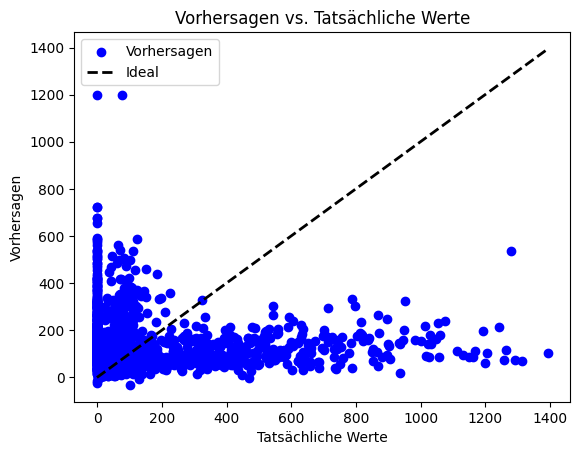

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, c='blue', label='Vorhersagen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', linewidth=2, label='Ideal')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagen')
plt.title('Vorhersagen vs. Tatsächliche Werte')
plt.legend()
plt.show()


Each point in the plot represents a single instance in the test set. The horizontal distance of each point to the ideal line indicates how far the prediction is from the actual value.
The ideal line represents the perfect prediction, where the predictions correspond exactly to the actual values. 

It is clear that the actual values are often underestimated rather than overestimated. The MSE also appears to be relatively high at 74534.73.



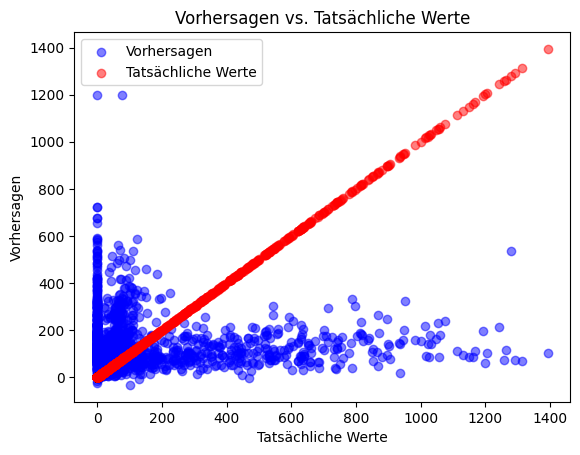

In [22]:
plt.scatter(y_test, predictions, c='blue', label='Vorhersagen', alpha=0.5) 
plt.scatter(y_test, y_test, c='red', label='Tatsächliche Werte', alpha=0.5) 
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagen')
plt.title('Vorhersagen vs. Tatsächliche Werte')
plt.legend()
plt.show()


This is antoher visualization of the same plot.

In [14]:
df_sorted = df.sort_values(by='tsolve')

df_sorted['combined'] = df_sorted['tsolve'].combine_first(df_sorted['predicted_tsolve'])

In [15]:
df_sorted

,tsolve,alg,nvars,seed,runseed,tsolve_filled,predicted_tsolve,combined
220,1.0,GR,5,8,4,1.0,NaN,1.000000
299,1.0,RS,5,10,10,1.0,NaN,1.000000
507,1.0,UEDA,6,7,10,1.0,NaN,1.000000
1113,1.0,UEDA,8,8,2,1.0,NaN,1.000000
108,1.0,UEDA,5,4,7,1.0,NaN,1.000000
...,...,...,...,...,...,...,...,...
7790,NaN,RS,30,10,7,-1.0,340.864868,340.864868
7791,NaN,UEDA,30,10,8,-1.0,115.221992,115.221992
7793,NaN,RS,30,10,8,-1.0,115.221992,115.221992
7796,NaN,RS,30,10,9,-1.0,287.585358,287.585358


All measured and predicted times for the right-censored data points are now displayed below.

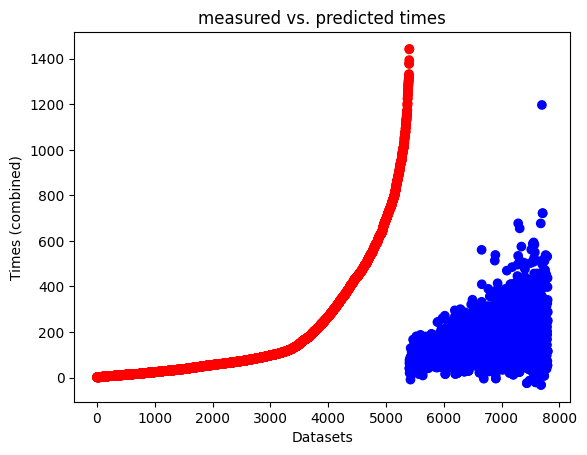

In [32]:
colors = np.where(df_sorted['tsolve'].notnull(), 'red', 'blue')

plt.scatter(range(len(df_sorted)), df_sorted['combined'], c=colors)

plt.xlabel('Datasets')
plt.ylabel('Times (combined)')
plt.title('measured vs. predicted times for all algorithms')
plt.show()

The same visualizations now follow, divided into the three solution algorithms, once sorted by data points and once sorted by the number of variables.

In [36]:
subset_A = df_sorted[df_sorted['alg'] == 'GR']
subset_B = df_sorted[df_sorted['alg'] == 'RS']
subset_C = df_sorted[df_sorted['alg'] == 'UEDA']

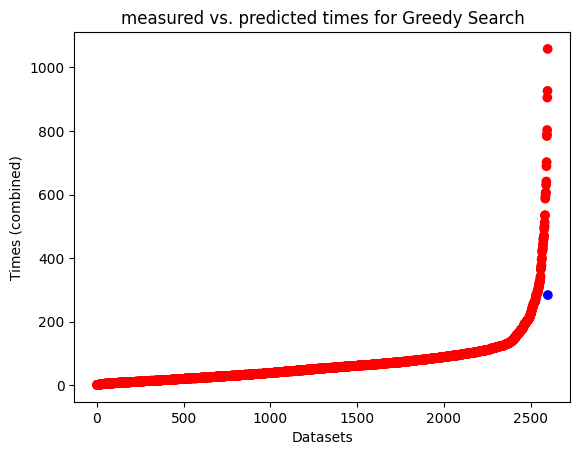

In [41]:
colors = np.where(subset_A['tsolve'].notnull(), 'red', 'blue')

plt.scatter(range(len(subset_A)), subset_A['combined'], c=colors)

plt.xlabel('Datasets')
plt.ylabel('Times (combined)')
plt.title('measured vs. predicted times for Greedy Search')
plt.show()

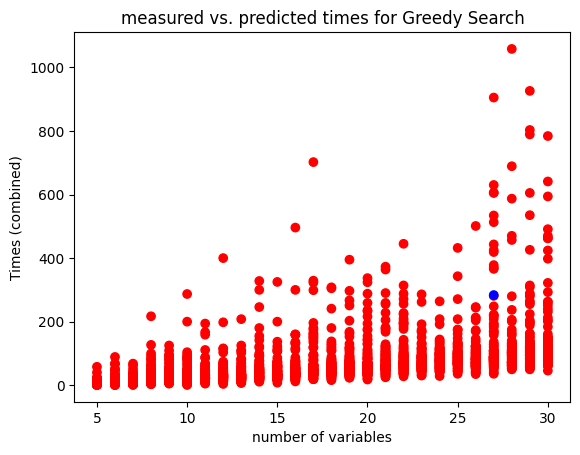

In [49]:
colors = np.where(subset_A['tsolve'].notnull(), 'red', 'blue')

plt.scatter(subset_A['nvars'], subset_A['combined'], c=colors)

plt.xlabel('number of variables')
plt.ylabel('Times (combined)')
plt.title('measured vs. predicted times for Greedy Search')
plt.show()

Greedy Search contains only a very small amount of right-censored data.

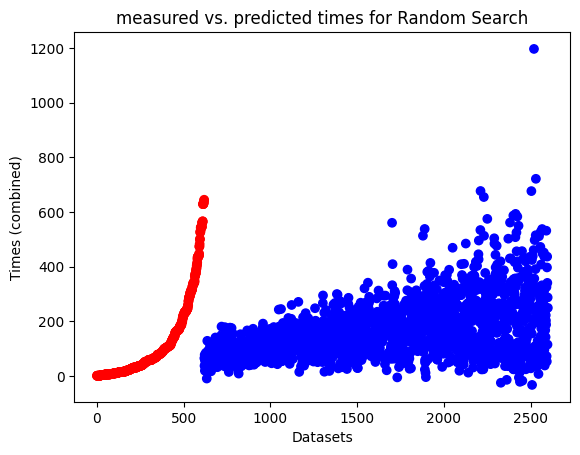

In [45]:
colors = np.where(subset_B['tsolve'].notnull(), 'red', 'blue')

plt.scatter(range(len(subset_B)), subset_B['combined'], c=colors)

plt.xlabel('Datasets')
plt.ylabel('Times (combined)')
plt.title('measured vs. predicted times for Random Search')
plt.show()

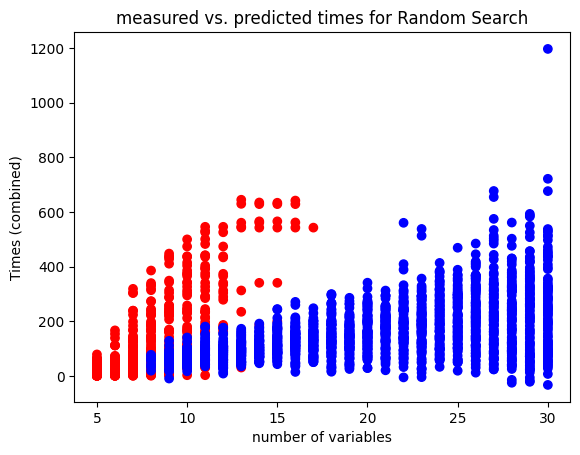

In [46]:
colors = np.where(subset_B['tsolve'].notnull(), 'red', 'blue')

plt.scatter(subset_B['nvars'], subset_B['combined'], c=colors)

plt.xlabel('number of variables')
plt.ylabel('Times (combined)')
plt.title('measured vs. predicted times for Random Search')
plt.show()

Random Search leads to a significantly higher number of right-censored data. The plots illustrate the previous finding that the times are underestimated. It can be seen visually that the predicted times should probably be higher.

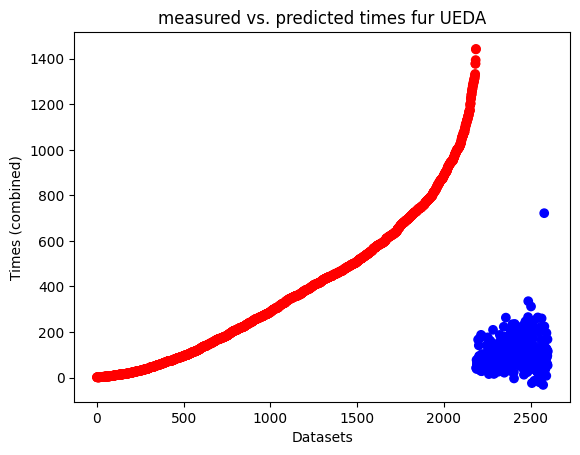

In [43]:
colors = np.where(subset_C['tsolve'].notnull(), 'red', 'blue')

plt.scatter(range(len(subset_C)), subset_C['combined'], c=colors)

plt.xlabel('Datasets')
plt.ylabel('Times (combined)')
plt.title('measured vs. predicted times fur UEDA')
plt.show()

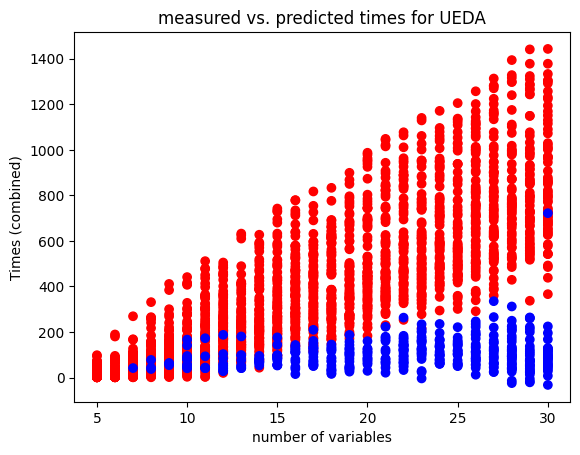

In [47]:
colors = np.where(subset_C['tsolve'].notnull(), 'red', 'blue')

plt.scatter(subset_C['nvars'], subset_C['combined'], c=colors)

plt.xlabel('number of variables')
plt.ylabel('Times (combined)')
plt.title('measured vs. predicted times for UEDA')
plt.show()

The same applies to the predicted times for UEDA.

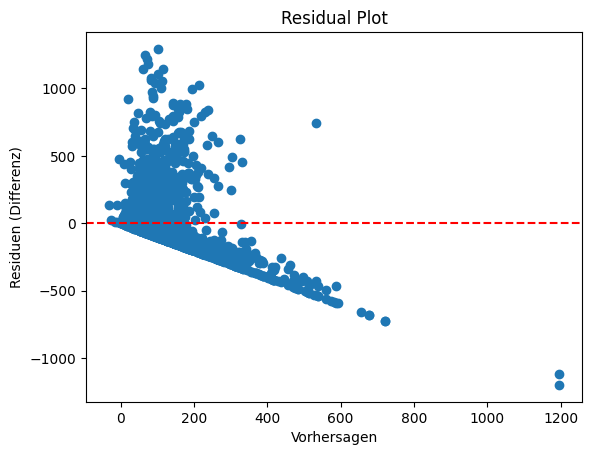

In [7]:
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Vorhersagen')
plt.ylabel('Residuen (Differenz)')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()


Each point in the plot represents a single instance in the test set. The vertical distance of each point from the horizontal line at 0 indicates the size of the residual for this prediction. 
The horizontal line at 0 indicates the reference point where the residuals are zero.

It looks as if more points are being overestimated rather than underestimated.

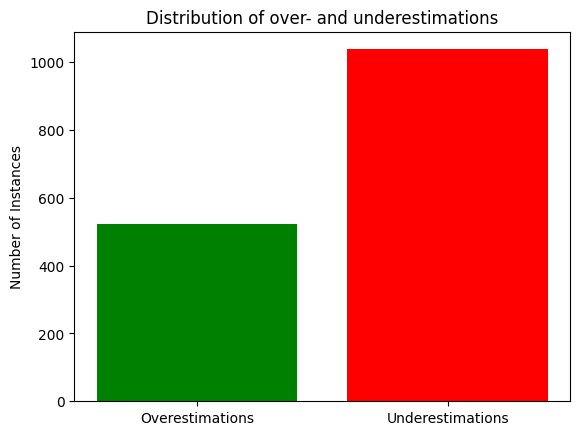

In [11]:
overestimations = residuals[residuals > 0]
underestimations = residuals[residuals < 0]

num_overestimations = len(overestimations)
num_underestimations = len(underestimations)

plt.bar(['Overestimations', 'Underestimations'], [num_overestimations, num_underestimations], color=['green', 'red'])
plt.xlabel('')
plt.ylabel('Number of Instances')
plt.title('Distribution of over- and underestimations')
plt.show()


The plot shows that underestimates predominate

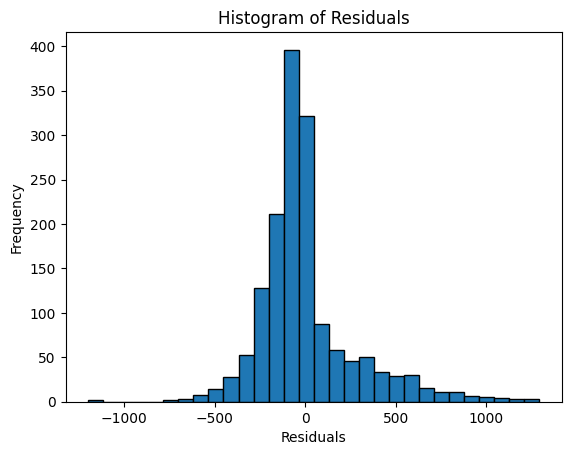

In [13]:
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

The histogram shows that the residuals to the left of the zero point occur significantly more frequently, but then fall off. 
This means that overestimated times are very close to the actual time. The situation is different for the underestimates to the right of the zero point. 
These are much more evenly distributed in their frequency of occurrence.

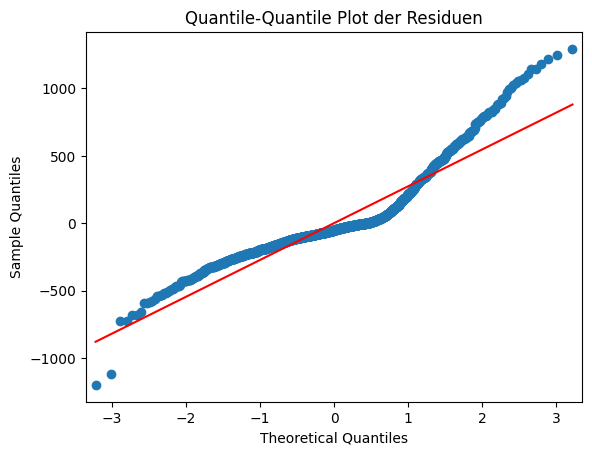

In [19]:
import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.title('Quantile-Quantile Plot der Residuen')
plt.show()

The quantile-quantile (Q-Q) plot is a graphical method for assessing the normality of the residuals. 

Since the points are mostly close to the straight line, this indicates that the residuals follow a nearly normal distribution. The straight line represents the expected quantiles of a normal distribution.

Slight deviations from the straight line (between 0 and 1 and above 2) may indicate that the residuals are not normally distributed there.

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 74534.73459875393
R² Score: -0.2716773034693316


27% of the variance in the dependent variable can be explained by the model.